In [1]:
import pandas as pd
import json
import numpy as np


# reading in data
data = pd.read_csv('data/booksummaries.txt', sep='\t', header = None)

data.drop(columns=[0, 1], inplace=True)
data[2] = data[2].astype(str)

In [2]:
data.head()

,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [3]:
data[5][0]

'{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}'

In [4]:


data.dtypes

2    object
3    object
4    object
5    object
6    object
dtype: object

In [5]:
# so this works now needs to be done to whole column 

# stdf = data[5].apply(json.loads)
# stdf = df['stats'].apply(json.loads)
# y = json.loads(data[5][1])

# test = data[5][0]

# type(test)
# y
# test

# droping any without tags

data[5].isnull().values.any()

data_2 = data.dropna(subset=[5])

data_2


,2,3,4,5,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",The series follows the character of Nick Ston...
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...


In [6]:
# sp here I toke apart the json

def remove_novel(x):
    if len(x) > 1 and 'Novel' in x:
        x.remove('Novel')
    if len(x) > 1 and 'Fiction' in x:
        x.remove('Fiction')   
    
    return x

# def remove_novel(x):
#     if 'Novel' in x:
#         x.remove('Novel')
#     if 'Fiction' in x:
#         x.remove('Fiction')   
    
#     return x


stdf = data_2[5].apply(json.loads)
stdf[0].values()



stdf = stdf.apply(lambda x: x.values())

stdf = stdf.apply(lambda x: list(x))

stdf = stdf.apply(remove_novel)

# stdf = stdf.apply(lambda x: x.remove('Novel') if ('Novel' in x and len(x) > 1) else x)

# stdf = stdf.dropna()

# stdf = stdf.apply(lambda x: x.remove('Fiction') if ('Fiction' in x and len(x) > 1)  else x)

print(stdf.isnull().values.any())

# stdf = stdf.dropna()

stdf

False


0        [Roman à clef, Satire, Children's literature, ...
1        [Science Fiction, Novella, Speculative fiction...
2                      [Existentialism, Absurdist fiction]
4        [Hard science fiction, Science Fiction, Specul...
5                                [War novel, Roman à clef]
                               ...                        
16549                                    [Science Fiction]
16551                                 [Thriller, Suspense]
16555                                           [Thriller]
16556                                      [Autobiography]
16558              [Epistolary novel, Speculative fiction]
Name: 5, Length: 12841, dtype: object

In [7]:
# test[lambda x: x!=1]
# stdf = stdf.map(lambda x: x[0] if len(x) > 1 else x[0])
stdf = stdf.map(lambda x: x[0])

# stdf[lambda x: len(x) > 1 ]
# s[s != 1]
stdf

0                Roman à clef
1             Science Fiction
2              Existentialism
4        Hard science fiction
5                   War novel
                 ...         
16549         Science Fiction
16551                Thriller
16555                Thriller
16556           Autobiography
16558        Epistolary novel
Name: 5, Length: 12841, dtype: object

In [8]:

count_subj = stdf.explode().value_counts()

count_subj
# list(stdf[0])
# np.array(stdf[0])
# data_2.insert(0, "subjects", stdf)

# stdf_2 = stdf.apply(lambda x: x[0])

# stdf_3 = stdf_2.unique()

# len(stdf_3)


count_subj = count_subj.to_frame()
count_subj

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
...,...
Catastrophic literature,1
School story,1
Collage,1
Social criticism,1


In [9]:
# so can i use these mystery, crime fiction, thriller, spy  all into one, fantasy with science fiction, young adult and childrens 

count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Speculative fiction,1444
Children's literature,1159
Novel,839
Fiction,783
Mystery,735
Crime Fiction,672
Fantasy,625
Thriller,568
Young adult literature,321


In [10]:
# data_2.insert(0, "subjects", stdf)

# test = data_2['subjects'][0]

# type(test)

stdf

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Crime Fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Thriller') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Spy fiction') else x)

stdf = stdf.map(lambda x : 'Mystery' if(x == 'Detective fiction') else x)

stdf = stdf.map(lambda x : 'Fiction' if(x == 'Novel') else x)

stdf = stdf.map(lambda x : 'Children\'s literature' if(x == 'Young adult literature') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Historical fiction') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'Alternate history') else x)

stdf = stdf.map(lambda x : 'Historical novel' if(x == 'War novel') else x)


#  square = lambda x : x*x if(x > 0)

In [11]:
# so not the best but lest call it a day and cut off everything after fantasy 
count_subj = stdf.explode().value_counts()

count_subj

count_subj = count_subj.to_frame()
count_subj.loc[count_subj[5] > 50]

,5
Science Fiction,2556
Mystery,2139
Fiction,1622
Children's literature,1480
Speculative fiction,1444
Historical novel,770
Fantasy,625
Non-fiction,167
Romance novel,140
Autobiography,94


In [12]:
data_2.insert(4, "category", stdf, True)

data_2

,2,3,4,5,category,6
0,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...",Roman à clef,"Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",Existentialism,The text of The Plague is divided into five p...
4,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",Hard science fiction,The novel posits that space around the Milky ...
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...,...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...
16555,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",Mystery,The reader first meets Rapp while he is doing...
16556,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",Autobiography,The book follows very rough chronological ord...


In [13]:
# not really ideal but I have close to 10K among 7 geners so hopefully will do 

data_3 = data_2.loc[(data_2['category'] == 'Science Fiction') | (data_2['category'] == 'Mystery') 
| (data_2['category'] == 'Fiction') | (data_2['category'] == 'Children\'s literature') 
| (data_2['category'] == 'Speculative fiction') | (data_2['category'] == 'Historical novel') | (data_2['category'] == 'Fantasy')                   
                   ]
# data_2['category'] in ['Science Fiction', 'Mystery']

data_3

,2,3,4,5,category,6
1,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...",Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...",Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...",Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...",Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,"{""/m/03mfnf"": ""Young adult literature""}",Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,"{""/m/01jfsb"": ""Thriller"", ""/m/06wkf"": ""Spy fic...",Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,"{""/m/06n90"": ""Science Fiction""}",Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction...",Mystery,The series follows the character of Nick Ston...


In [14]:
data_3 = data_3.drop(columns=[5])
data_3
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                 stratify=y, 
#                                                 test_size=0.25)

,2,3,4,category,6
1,A Clockwork Orange,Anthony Burgess,1962,Science Fiction,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,Historical novel,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,Children's literature,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,Science Fiction,Beginning several months after the events in ...
...,...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,Children's literature,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,Mystery,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,Science Fiction,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,Mystery,The series follows the character of Nick Ston...


In [15]:
y = data_3['category']
y

1              Science Fiction
5             Historical novel
6        Children's literature
8              Science Fiction
9              Science Fiction
                 ...          
16541    Children's literature
16542                  Mystery
16549          Science Fiction
16551                  Mystery
16555                  Mystery
Name: category, Length: 10636, dtype: object

In [16]:
data_3 = data_3.drop(columns=['category'])
data_3

,2,3,4,6
1,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan..."
5,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"The book tells the story of Paul Bäumer, a Ge..."
6,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger..."
8,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"Living on Mars, Deckard is acting as a consul..."
9,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,Beginning several months after the events in ...
...,...,...,...,...
16541,Nevermore: The Final Maximum Ride Adventure,James Patterson,2012-08-06,The prologue is Angel's vision of Max's death...
16542,The Bourne Imperative,Robert Ludlum,2012-06-05,:For a more detailed background of the main c...
16549,The Third Lynx,Timothy Zahn,2007,The story starts with former government agent...
16551,Remote Control,Andy McNab,1997,The series follows the character of Nick Ston...


In [17]:
# the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_3, y,
                                                stratify=y, 
                                                test_size=0.34)


In [18]:
y_train.value_counts()

Science Fiction          1687
Mystery                  1412
Fiction                  1070
Children's literature     977
Speculative fiction       953
Historical novel          508
Fantasy                   412
Name: category, dtype: int64

In [34]:
# categories = ['alt.atheism', 'soc.religion.christian',
#                'comp.graphics', 'sci.med']

# from sklearn.datasets import fetch_20newsgroups
# twenty_train = fetch_20newsgroups(subset='train',
#      categories=categories, shuffle=True, random_state=42)

# twenty_train
y_train

14644        Science Fiction
10569                Mystery
7492        Historical novel
6133                 Fiction
14734                Mystery
                ...         
3624     Speculative fiction
9757                 Fiction
2866                 Fantasy
9624         Science Fiction
216          Science Fiction
Name: category, Length: 7019, dtype: object

In [25]:
# X_train[6]
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train[6])
X_train_counts.shape

(7019, 76998)

In [26]:
count_vect.vocabulary_.get(u'algorithm')

2700

In [29]:
# tf -idf stuff
from sklearn.feature_extraction.text import TfidfTransformer
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(7019, 76998)

In [35]:
# trainging the model 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [43]:
# ohh wow it does not do good i guess 7 categories so that is better than just guessing 
print(clf.score(X_train_tfidf, y_train))
X_train_tfidf

0.4734292634278387


<7019x76998 sparse matrix of type '<class 'numpy.float64'>'
	with 1436359 stored elements in Compressed Sparse Row format>

In [42]:
X_new_counts = count_vect.transform(X_test[6])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted


array(['Science Fiction', 'Mystery', 'Science Fiction', ...,
       'Science Fiction', 'Science Fiction', 'Science Fiction'],
      dtype='<U21')

In [44]:
import numpy as np
np.mean(predicted == y_test)

0.3793198783522256

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])

text_clf.fit(X_train[6], y_train)
Pipeline(...)
predicted = text_clf.predict(X_test[6])
np.mean(predicted == y_test)

0.599668233342549

In [50]:
# should propably double check this 
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
metrics.confusion_matrix(y_test, predicted)

                       precision    recall  f1-score   support

Children's literature       0.62      0.61      0.62       503
              Fantasy       0.70      0.12      0.21       213
              Fiction       0.58      0.44      0.50       552
     Historical novel       0.58      0.42      0.49       262
              Mystery       0.61      0.84      0.71       727
      Science Fiction       0.60      0.85      0.71       869
  Speculative fiction       0.53      0.26      0.35       491

             accuracy                           0.60      3617
            macro avg       0.60      0.51      0.51      3617
         weighted avg       0.60      0.60      0.57      3617



array([[308,   2,  43,  10,  60,  52,  28],
       [ 27,  26,   8,   5,  25,  83,  39],
       [ 55,   0, 245,  26, 137,  78,  11],
       [ 15,   0,  37, 110,  42,  55,   3],
       [ 18,   1,  24,   8, 612,  60,   4],
       [ 19,   4,  18,   4,  54, 742,  28],
       [ 55,   4,  46,  26,  70, 164, 126]], dtype=int64)

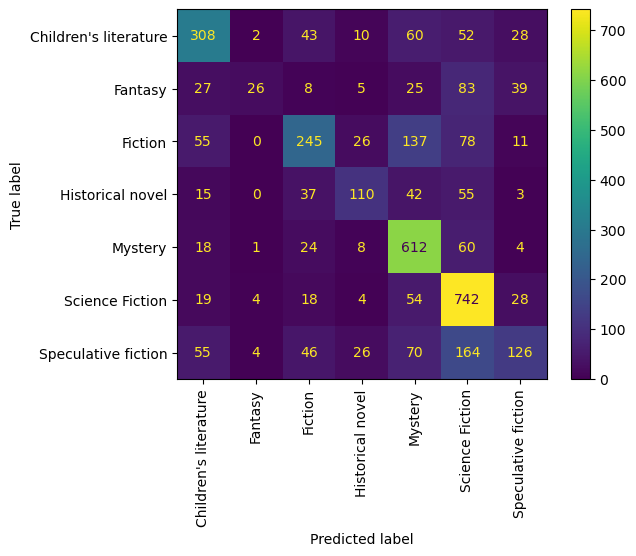

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
ConfusionMatrixDisplay.from_predictions(y_test, predicted, xticks_rotation='vertical')
# disp.plot(xticks_rotation='horizontal')
# plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {
     'vect__ngram_range': [(1, 1), (1, 2)],
     'tfidf__use_idf': (True, False),
     'clf__alpha': (1e-2, 1e-3),
}

In [64]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [65]:
gs_clf = gs_clf.fit(X_train[6], y_train)

In [66]:
# so now AM I using the best model??
print(gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


0.6067834899980303
clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)
